# Outliers

Handling outliers is an important part of data preprocessing because outliers can significantly affect the results of data analysis and machine learning models. Outliers are data points that deviate significantly from the rest of the data.

Each of these methods has its advantages and may be more suitable for different types of data or analysis scenarios:

- **Z-Score Method** is sensitive to the distribution of data and assumes that data follows a normal distribution. It's a parametric method, so it may not work well for non-normally distributed data.

- **IQR Method** is robust to outliers and is less influenced by the data distribution. It's a non-parametric method, making it suitable for a wider range of data types.

- **Percentile Method** provides flexibility in choosing the percentage of data points to treat as outliers but doesn't rely on specific data distribution assumptions. It's adaptable to various scenarios.

The choice of method depends on your data and the assumptions you can make about it. It's often a good practice to use multiple methods and consider the context of your analysis when identifying and handling outliers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


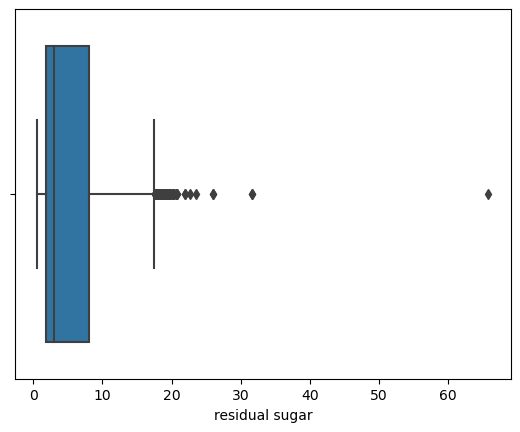

In [5]:
sns.boxplot(data['residual sugar'])
plt.show()

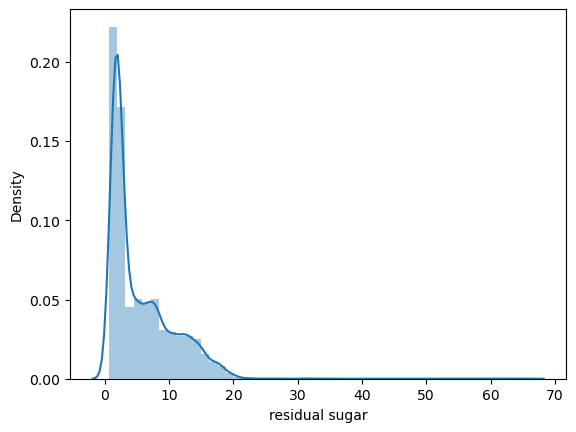

In [6]:
sns.distplot(data['residual sugar'])
plt.show()

# fixing with   Z-score method



1. **Z-Score Method:**
   - The Z-score measures how many standard deviations a data point is away from the mean of the dataset.
   - The formula for calculating the Z-score for a data point 'x' in a dataset with mean 'μ' and standard deviation 'σ' is: Z = (x - μ) / σ.
   - Common practice is to consider data points with Z-scores above a certain threshold (e.g., ±2 or ±3) as outliers.



In [12]:
# first finr the upper and lower limit of the column 

upper_limit = data['residual sugar'].mean() + 3*data['residual sugar'].std()
lower_limit = data['residual sugar'].mean() - 3*data['residual sugar'].std()

In [13]:
print("Upper limit : ", upper_limit)
print("Lower limit : ", lower_limit)

Upper limit :  19.71870063294501
Lower limit :  -8.830047823091236


### Finding Outliers

In [25]:
df_outliers = data.loc[(data['residual sugar'] > upper_limit) | (data['residual sugar'] < lower_limit)]

In [26]:
print(f"number of outliers are  {len(df_outliers)}")

number of outliers are  26


## we can do trmming and capping with this to handle the outliers

### Trimming

In [29]:
df_trim = data.loc[(data['residual sugar'] < upper_limit) & (data['residual sugar'] > lower_limit)]

In [30]:
print(f"Before Removing outliers = {len(data)}")
print(f"After Removing outliers = {len(df_trim)}")
print(f"Total number of outliers = {len(data)-len(df_trim)}")

Before Removing outliers = 6497
After Removing outliers = 6469
Total number of outliers = 28


<AxesSubplot:xlabel='residual sugar'>

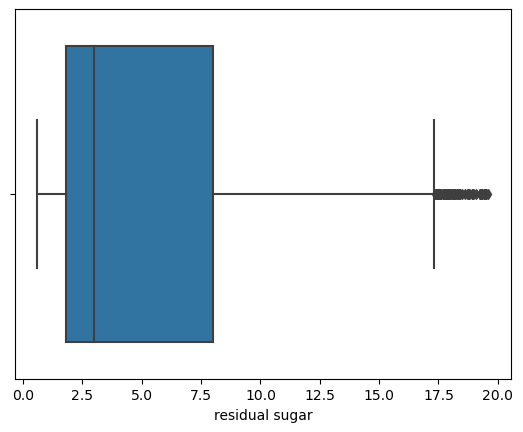

In [37]:
sns.boxplot(df_trim['residual sugar'])

# Capping

In [33]:
df_cap = data.copy()
df_cap.loc[df_cap['residual sugar']>upper_limit , 'residual sugar'] = upper_limit
df_cap.loc[df_cap['residual sugar'] < lower_limit , 'residual sugar'] = lower_limit

In [34]:
len(df_cap)

6497

In [35]:
len(data)

6497

<AxesSubplot:xlabel='residual sugar'>

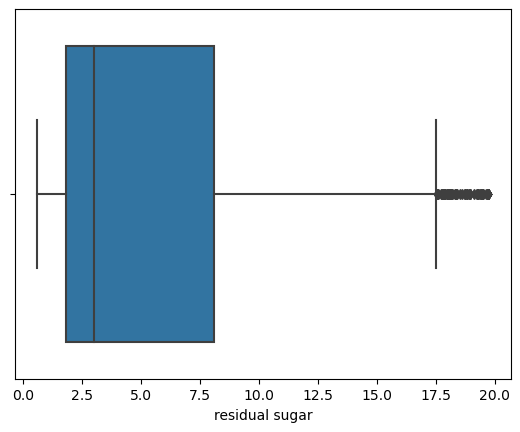

In [38]:
sns.boxplot(df_cap['residual sugar'])

# IQR Method

2. **IQR (Interquartile Range) Method:**
   - The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the dataset. It measures the spread of the middle 50% of the data.
   - Outliers in this method are often defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. These values are sometimes referred to as the "inner fences."
   - Extreme outliers can be defined as data points that fall below Q1 - 3 * IQR or above Q3 + 3 * IQR. These values are referred to as the "outer fences."



In [40]:
# finding the upper Q3  and lower limit Q1

Q1 = data['residual sugar'].quantile(.25)
Q3 = data['residual sugar'].quantile(.75)
IQR = Q3-Q1

In [41]:
Q1, Q3, IQR

(1.8, 8.1, 6.3)

In [42]:
upper_lim = Q3 + (1.5*IQR)
lower_lim = Q1 - (1.5*IQR)

In [43]:
print(lower_lim , upper_lim)

-7.6499999999999995 17.549999999999997


In [45]:
# finding the outliers 
df_outliers = data.loc[(data['residual sugar'] > upper_lim) | (data['residual sugar'] < lower_lim)]

In [46]:
len(df_outliers)

118

# trmiming

In [47]:
data_trim = data.loc[(data['residual sugar'] < upper_lim) & (data['residual sugar'] > lower_lim)]
len(data_trim)

6377

In [48]:
len(data)

6497

<AxesSubplot:xlabel='residual sugar'>

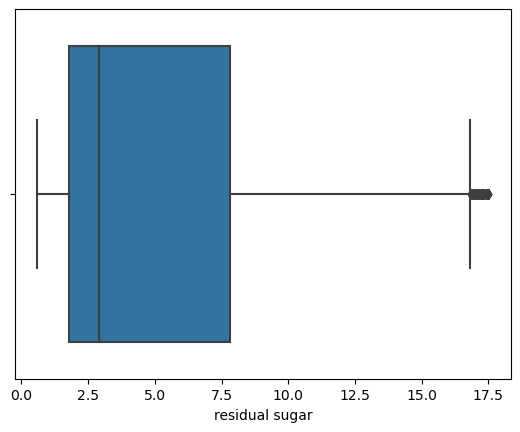

In [49]:
sns.boxplot(data_trim['residual sugar'])

# Capping

In [50]:
data_cap = data.copy()
data_cap.loc[data_cap['residual sugar'] > upper_lim , 'residual sugar'] = upper_lim
data_cap.loc[data_cap['residual sugar'] < lower_lim , 'residual sugar'] = lower_lim



In [51]:
len(data_cap)  # capped data

6497

In [53]:
len(data)       # original data


6497

<AxesSubplot:xlabel='residual sugar'>

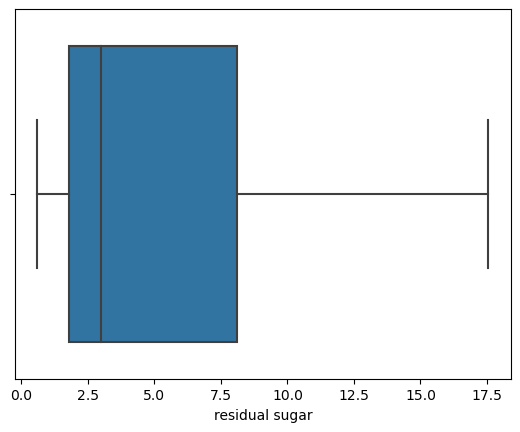

In [54]:
sns.boxplot(data_cap['residual sugar'])

# Percentile method

3. **Percentile Method:**
   - In the percentile method, you define a threshold based on percentiles of the data distribution.
   - For example, you might consider data points below the 5th percentile or above the 95th percentile as outliers.
   - This method allows you to specify a specific percentage of data points as outliers based on your chosen threshold.



In [55]:
upper_limit = data['residual sugar'].quantile(0.99)
lower_limit = data['residual sugar'].quantile(0.01)
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

Upper limit 18.2
Lower limit 0.9


In [56]:
# finding the outliers 

df_out = data.loc[(data['residual sugar'] > upper_limit) | (data['residual sugar'] < lower_limit)]
len(df_out)

97

# Trimming

In [57]:
df_tim = data.loc[(data['residual sugar'] < upper_limit) & (data['residual sugar'] > lower_limit)]


In [60]:
print("Before Trimming = ", len(data))
print("After Trimming = ", len(df_tim))

Before Trimming =  6497
After Trimming =  6354


<AxesSubplot:xlabel='residual sugar'>

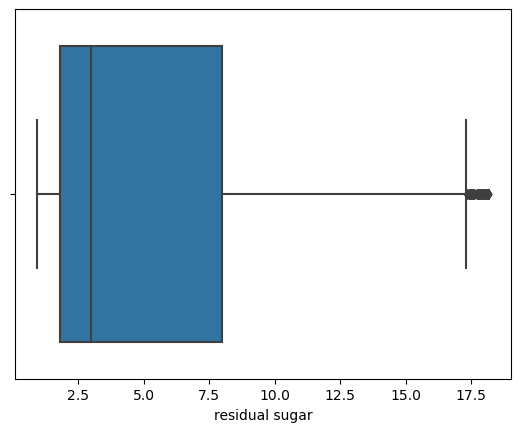

In [65]:
sns.boxplot(df_tim['residual sugar'])

# Capping 

In [66]:
data_cap = data.copy()

data_cap.loc[data_cap['residual sugar'] > upper_limit , 'residual sugar'] = upper_limit
data_cap.loc[data_cap['residual sugar'] < lower_limit , 'residual sugar'] = lower_limit


In [67]:
print("Before Trimming = ", len(data))
print("After Trimming = ", len(data_cap))

Before Trimming =  6497
After Trimming =  6497


<AxesSubplot:xlabel='residual sugar'>

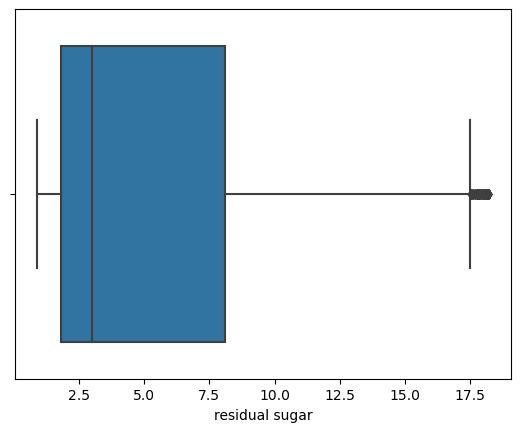

In [68]:
sns.boxplot(data_cap['residual sugar'])

# Viewing All The columns at once

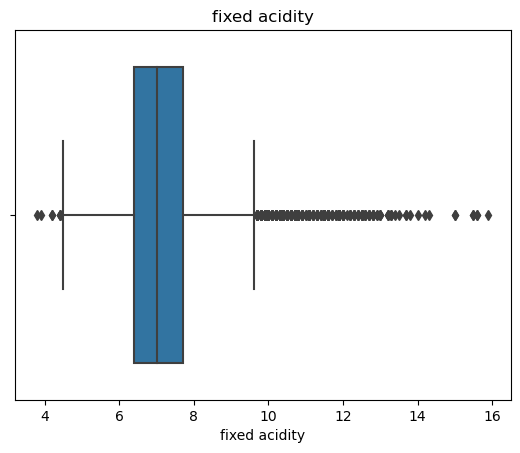

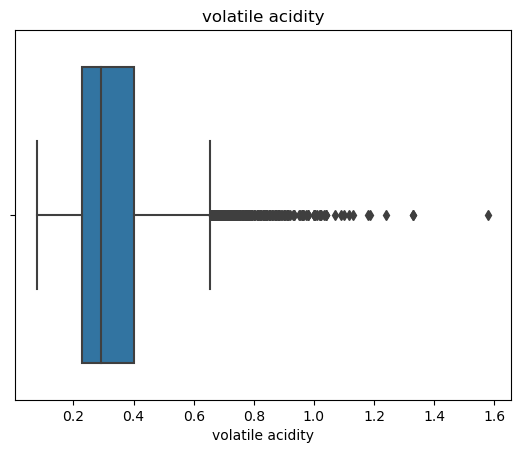

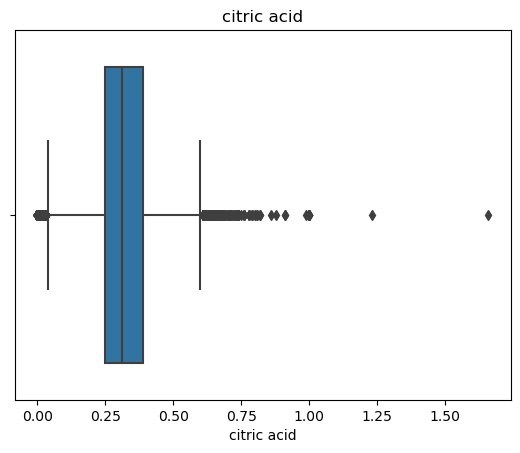

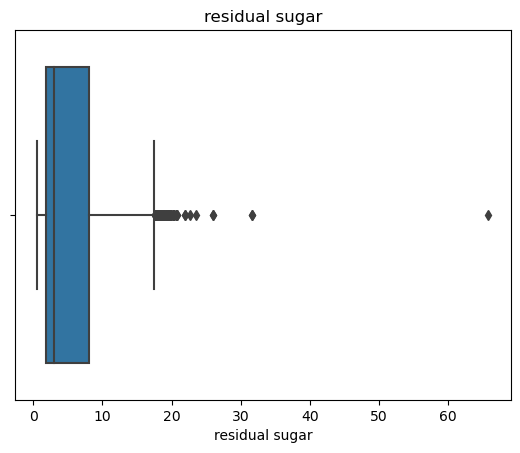

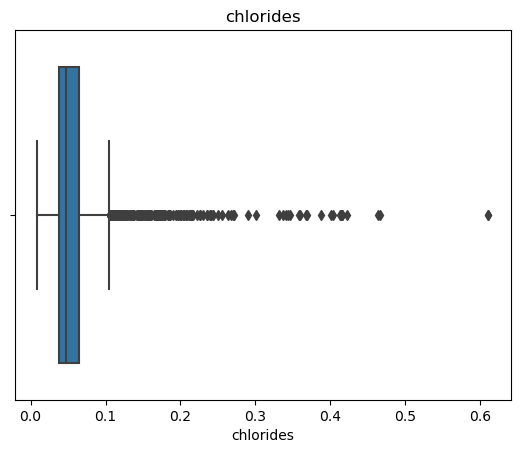

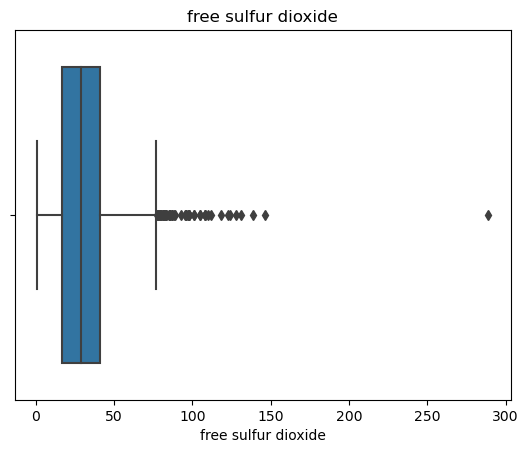

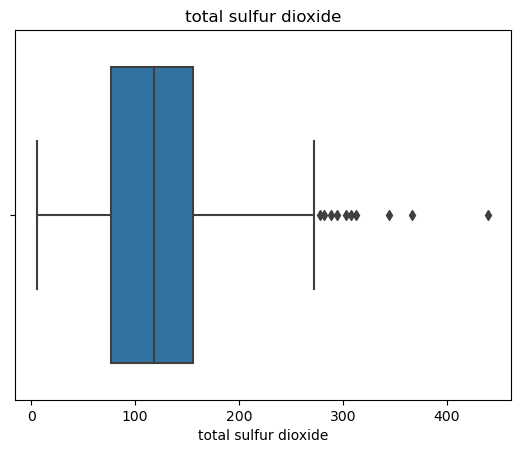

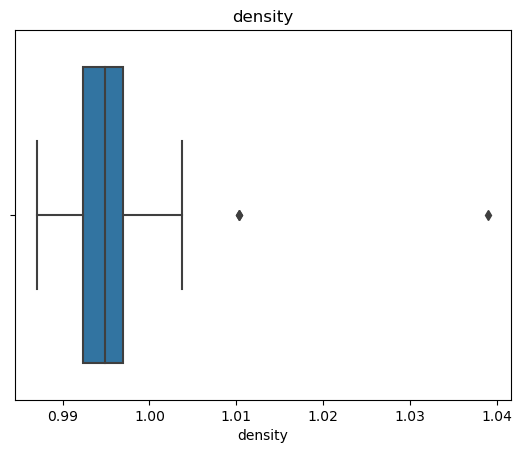

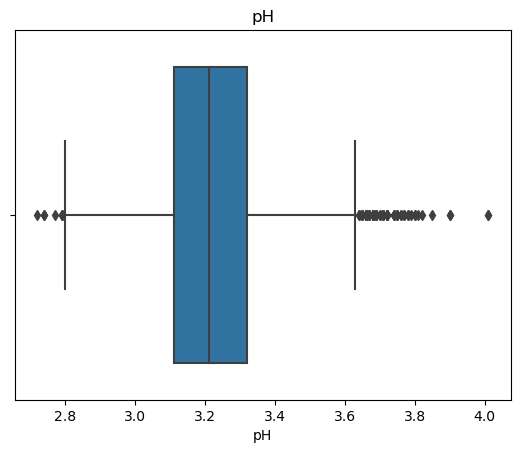

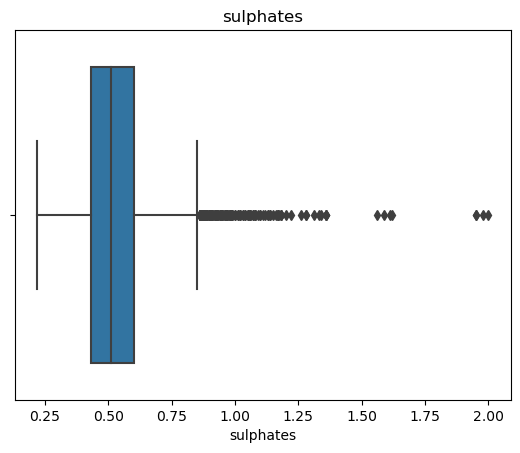

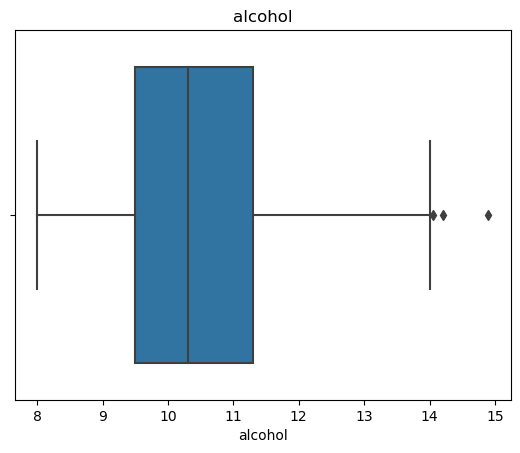

In [74]:
for col in data.columns:
    if data[col].dtype == 'int' or data[col].dtype == 'float':
        sns.boxplot(data[col])
        plt.title(col)
        plt.show()